In [1]:
import sys
sys.path.append('../src')

In [26]:
import json
from glob import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
import torchvision
from models.nft_reverse_engineer import NFTReverseEngineer
from data.meebit_dataloader import MeebitDataLoader

In [27]:
with open('../data/meebits/metadata.json', 'r') as f:
    metadata = json.loads(f.read())
    f.close()

In [28]:
dataloader = MeebitDataLoader('../data/meebits/images/', metadata, batch_size=1)
dataloader.setup()

In [29]:
_, (_, attributes, image) = next(enumerate(dataloader.train_dataloader()))

In [30]:
attributes.shape, image.shape

(torch.Size([1, 21]), torch.Size([1, 3, 1536, 1024]))

In [37]:
model = NFTReverseEngineer()
model

NFTReverseEngineer(
  (mse_loss): MSELoss()
  (psnr_loss): PSNRLoss()
  (ssim_loss): SSIMLoss()
  (model): NFTReverseEngineerStyleGAN(
    (fully_connected): Sequential(
      (0): Linear(in_features=21, out_features=64, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=256, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=256, out_features=512, bias=True)
      (7): LeakyReLU(negative_slope=0.01)
      (8): Linear(in_features=512, out_features=1024, bias=True)
      (9): LeakyReLU(negative_slope=0.01)
      (10): Linear(in_features=1024, out_features=1024, bias=True)
      (11): LeakyReLU(negative_slope=0.01)
      (12): Linear(in_features=1024, out_features=1024, bias=True)
      (13): LeakyReLU(negative_slope=0.01)
      (14): Linear(in_features=1024, out_features=1024, bias=True)
      (15): Lea

In [38]:
feature = attributes.float().cuda()

In [47]:
model.load_from_checkpoint('../models/epoch=22-step=74197.ckpt')
model = model.to('cuda')
for param in model.parameters():
    if param.is_cuda != True:
        print(param)
prediction = model(attributes)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_mm)

In [33]:
tensor_to_PIL = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize((800,600))
])

In [16]:
predictions = []
for pred in prediction:
    predictions.append(tensor_to_PIL(pred))
    
true_images = []
for img in image:
    true_images.append(tensor_to_PIL(img))

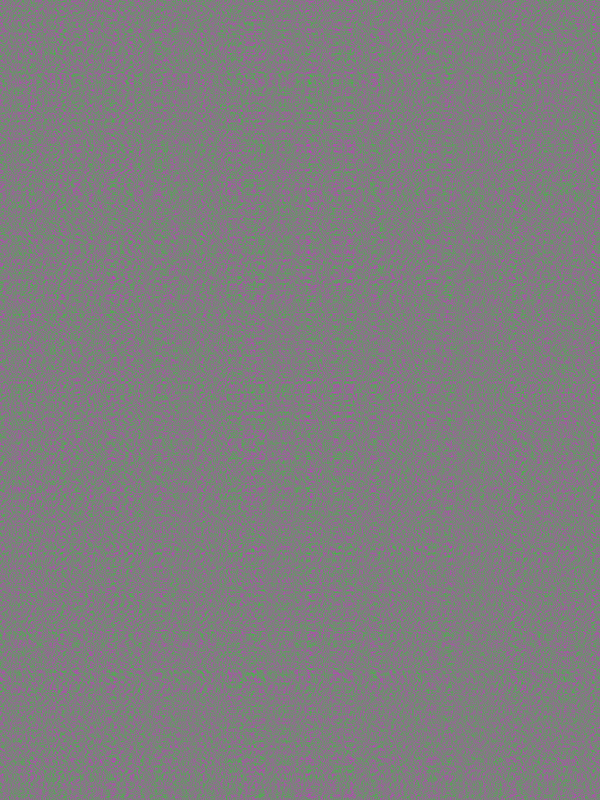

In [17]:
predictions[0]

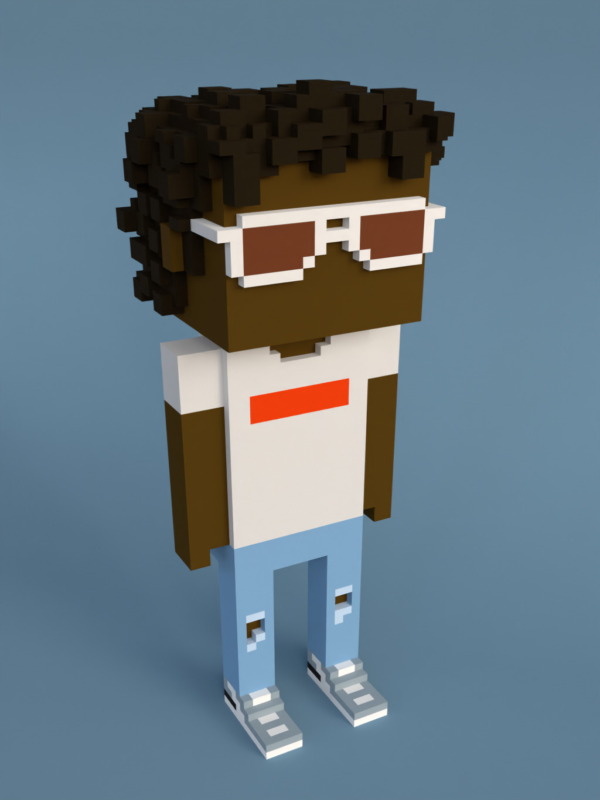

In [18]:
true_images[0]